In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = './data/heartbeat_EDL.csv'
df = pd.read_csv(file_path, sep='\t')
df.columns = ['CHANNEL', 'EVENT', 'CLIP NAME', 'START TIME', 'END TIME', 'DURATION', 'STATE']

In [36]:
df.head()

,CHANNEL,EVENT,CLIP NAME,START TIME,END TIME,DURATION,STATE
0,1,1,Heartbeat Tempo Mapped-11.L,00:00:03:10,00:00:03:29,00:00:00:18,Unmuted
1,1,2,Heartbeat Tempo Mapped-91.L,00:00:03:29,00:00:04:07,00:00:00:08,Unmuted
2,1,3,Heartbeat Tempo Mapped-92.L,00:00:04:07,00:00:04:25,00:00:00:17,Unmuted
3,1,4,Heartbeat Tempo Mapped-93.L,00:00:04:25,00:00:05:03,00:00:00:08,Unmuted
4,1,5,Heartbeat Tempo Mapped-37.L,00:00:05:03,00:00:05:21,00:00:00:17,Unmuted


In [37]:
df.shape

(1236, 7)

In [38]:
df['DURATION'] = df['DURATION'].str.strip()
df['START TIME'] = df['START TIME'].str.strip()
df['END TIME'] = df['END TIME'].str.strip()

In [45]:
#clean data
df_cleaned = df[df['DURATION'] != "00:00:00:00"]

# Reindex the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df_cleaned)

      CHANNEL  EVENT                       CLIP NAME   START TIME  \
0           1      1  Heartbeat Tempo Mapped-11.L     00:00:03:10   
1           1      2  Heartbeat Tempo Mapped-91.L     00:00:03:29   
2           1      3  Heartbeat Tempo Mapped-92.L     00:00:04:07   
3           1      4  Heartbeat Tempo Mapped-93.L     00:00:04:25   
4           1      5  Heartbeat Tempo Mapped-37.L     00:00:05:03   
...       ...    ...                             ...          ...   
1095        1   1231  Heartbeat Tempo Mapped-84.L     00:11:27:28   
1096        1   1233  Heartbeat Tempo Mapped-42.L     00:11:28:08   
1097        1   1234  Heartbeat Tempo Mapped-34.L     00:11:29:00   
1098        1   1235  Heartbeat Tempo Mapped-35.L     00:11:29:10   
1099        1   1236  Heartbeat Tempo Mapped-36.L     00:11:30:03   

         END TIME     DURATION    STATE  Beats  
0     00:00:03:29  00:00:00:18  Unmuted      1  
1     00:00:04:07  00:00:00:08  Unmuted      0  
2     00:00:04:25  00:00

In [46]:
df_cleaned.shape

(1100, 8)

In [47]:
df_cleaned.head()

,CHANNEL,EVENT,CLIP NAME,START TIME,END TIME,DURATION,STATE,Beats
0,1,1,Heartbeat Tempo Mapped-11.L,00:00:03:10,00:00:03:29,00:00:00:18,Unmuted,1
1,1,2,Heartbeat Tempo Mapped-91.L,00:00:03:29,00:00:04:07,00:00:00:08,Unmuted,0
2,1,3,Heartbeat Tempo Mapped-92.L,00:00:04:07,00:00:04:25,00:00:00:17,Unmuted,1
3,1,4,Heartbeat Tempo Mapped-93.L,00:00:04:25,00:00:05:03,00:00:00:08,Unmuted,0
4,1,5,Heartbeat Tempo Mapped-37.L,00:00:05:03,00:00:05:21,00:00:00:17,Unmuted,1


In [48]:
def timecode_to_frames(timecode):
    hours, minutes, seconds, frames = map(int, timecode.split(':'))
    total_frames = ((hours * 3600) + (minutes * 60) + seconds) * 30 + frames
    return total_frames

# Apply the function to the 'START TIME' column and create a new 'Frames' column
df_cleaned['Frames'] = df_cleaned['START TIME'].apply(timecode_to_frames)
df_cleaned['Beats'] = [1 if i % 2 == 0 else 0 for i in range(len(df_cleaned))]
df_cleaned.head()

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_8124/1324600823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Frames'] = df_cleaned['START TIME'].apply(timecode_to_frames)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_8124/1324600823.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Beats'] = [1 if i % 2 == 0 else 0 for i in range(len(df_cleaned))]


,CHANNEL,EVENT,CLIP NAME,START TIME,END TIME,DURATION,STATE,Beats,Frames
0,1,1,Heartbeat Tempo Mapped-11.L,00:00:03:10,00:00:03:29,00:00:00:18,Unmuted,1,100
1,1,2,Heartbeat Tempo Mapped-91.L,00:00:03:29,00:00:04:07,00:00:00:08,Unmuted,0,119
2,1,3,Heartbeat Tempo Mapped-92.L,00:00:04:07,00:00:04:25,00:00:00:17,Unmuted,1,127
3,1,4,Heartbeat Tempo Mapped-93.L,00:00:04:25,00:00:05:03,00:00:00:08,Unmuted,0,145
4,1,5,Heartbeat Tempo Mapped-37.L,00:00:05:03,00:00:05:21,00:00:00:17,Unmuted,1,153


In [55]:
df_cleaned.tail()

,CHANNEL,EVENT,CLIP NAME,START TIME,END TIME,DURATION,STATE,Beats,Frames
1095,1,1231,Heartbeat Tempo Mapped-84.L,00:11:27:28,00:11:28:06,00:00:00:08,Unmuted,0,20638
1096,1,1233,Heartbeat Tempo Mapped-42.L,00:11:28:08,00:11:28:26,00:00:00:17,Unmuted,1,20648
1097,1,1234,Heartbeat Tempo Mapped-34.L,00:11:29:00,00:11:29:08,00:00:00:07,Unmuted,0,20670
1098,1,1235,Heartbeat Tempo Mapped-35.L,00:11:29:10,00:11:29:28,00:00:00:18,Unmuted,1,20680
1099,1,1236,Heartbeat Tempo Mapped-36.L,00:11:30:03,00:11:30:10,00:00:00:07,Unmuted,0,20703


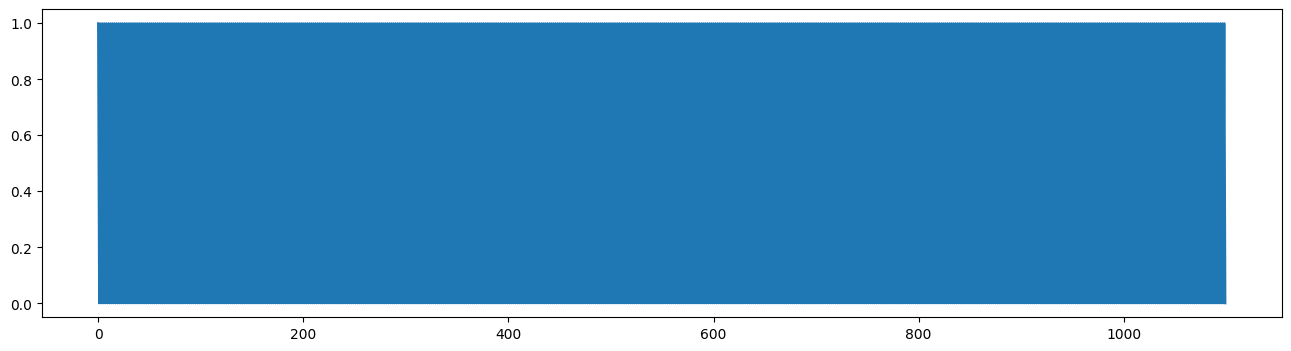

In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(16, 4))
plt.plot(df_cleaned.index, df_cleaned['Beats'])
# Save the figure
plt.savefig("../img/beats.png")

# Display the plot
plt.show()

In [56]:
# Save the new DataFrame as a CSV file
output_path = './data/heartbeat_01.csv'
df_cleaned.to_csv(output_path, index=False)